In [1]:
%matplotlib inline

import json
import math

import numpy
import matplotlib.pyplot as plot
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV#, RandomizedSearchCV

/opt/anaconda/envs/bd9/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda/envs/bd9/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
with open('./sentiment_data/pos_reviews.json') as data_file:    
    data_pos = json.load(data_file)
with open('./sentiment_data/neg_reviews.json') as data_file:    
    data_neg = json.load(data_file)

In [3]:
pos_texts = list(data_pos.keys())
neg_texts = list(data_neg.keys())
all_texts = pos_texts + neg_texts

In [4]:
target = [1]*1000 + [0]*1000

In [5]:
count_vect = CountVectorizer()
matrix_count = count_vect.fit_transform(all_texts).toarray()

In [27]:
matrix_count.shape

(2000, 39659)

In [7]:
words = [x[0] for x in sorted(count_vect.vocabulary_.items(), key=lambda x: x[1])]
pd.DataFrame(matrix_count, columns=words).head(15)

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
def cross_valid(matrix_counts, target, test_size=0.3, random_state=7):
    X_train, X_test, Y_train, Y_test = train_test_split(matrix_counts, target, 
                                                        test_size=test_size,
                                                        random_state=random_state)
    return (X_train, X_test, Y_train, Y_test)

In [76]:
X_train, X_test, Y_train, Y_test = cross_valid(matrix_count, target, test_size=0.1)

In [56]:
sum(Y_train)

1800

In [57]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
predict = model.predict_proba(X_test)

In [59]:
precision, recall, _ = metrics.precision_recall_curve(Y_test, predict[:,1])

(0.0, 1)

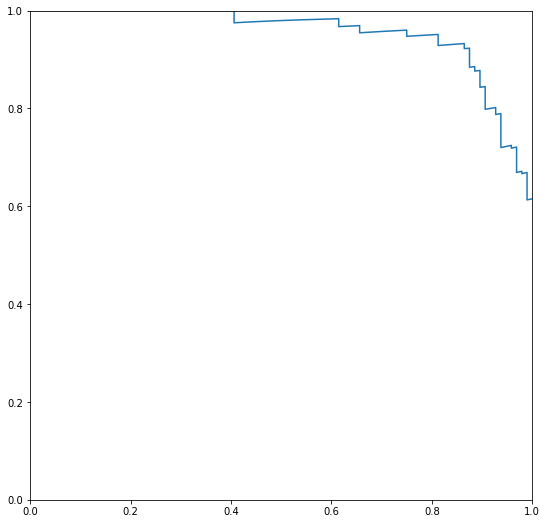

In [60]:
plot.figure(figsize = (9,9))
plot.plot(recall, precision, label='R-P')

plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1])

In [61]:
def roc_curve(title, Y_test, predicted, label='?'):
    fpr, tpr, th = metrics.roc_curve(Y_test, predicted[:,1])
    plot.plot(fpr, tpr, label=label);
    plot.xlabel('False Positive'); plot.ylabel('True Positive'); plot.title(title)
    plot.legend(bbox_to_anchor=(1, 1), loc=2); plot.xlim([0.0, 1.0]); plot.ylim([0.0, 1]);
    print ('(Logistic Regression (', label, ') AUC = ', metrics.auc(fpr, tpr))

(Logistic Regression ( ? ) AUC =  0.9517227564102564


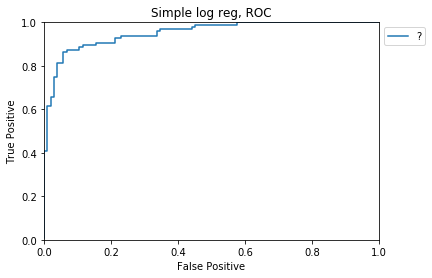

In [62]:
roc_curve('Simple log reg, ROC', Y_test, predict)

Как же объединить COuntVectorizer и модель воедино? Авторы sklearn и тут нам помогут

In [63]:
from sklearn.pipeline import Pipeline# , FeatureUnion


In [64]:
p = Pipeline(
    [('cv', CountVectorizer()),
    ('logreg', LogisticRegression())])
p

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [69]:
X_train, X_test, Y_train, Y_test = cross_valid(all_texts, target, test_size=0.1)

In [70]:
p.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [71]:
predict = p.predict_proba(X_test)

(Logistic Regression ( ? ) AUC =  0.9517227564102564


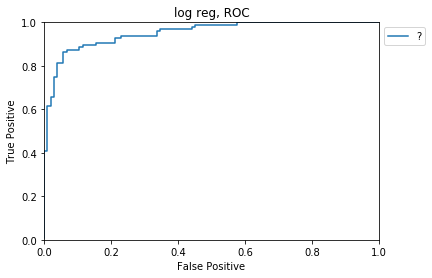

In [72]:
roc_curve('log reg, ROC', Y_test, predict)


Регуляризация логрег

In [77]:
model_l1 = LogisticRegression(penalty='l1')
model_l1.fit(X_train, Y_train)
predict_l1 = model_l1.predict_proba(X_test)

In [78]:
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, Y_train)
predict_l2 = model_l2.predict_proba(X_test)

(Logistic Regression ( l2 ) AUC =  0.9517227564102564
(Logistic Regression ( l1 ) AUC =  0.9251802884615384


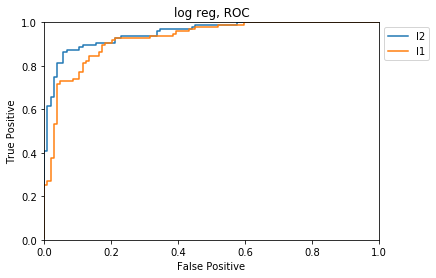

In [79]:
roc_curve('log reg, ROC', Y_test, predict_l2, label='l2')
roc_curve('log reg, ROC', Y_test, predict_l1, label='l1')

In [80]:
def report_cross_validation(grid_searcher, X_test, Y_test):
    print ('train score is {:.5f}'.format(grid_searcher.best_score_))
    print ('test score is {:.5f}'.format(grid_searcher.score(X_test, Y_test)))
    print ('best parameter set:')
    for k in sorted(grid_searcher.best_params_):
        print (' * {}={}'.format(k, grid_searcher.best_params_[k]))

In [103]:
count_vect = CountVectorizer()
matrix_count = count_vect.fit_transform(all_texts).toarray()
X_train, X_test, Y_train, Y_test = cross_valid(matrix_count, target, test_size=0.3)

In [104]:
%%time
c = [2**(x/10.0) for x in range(-100, 150, 50)]

grid_searcher = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid={
        'C': c,
        'penalty': ['l1', 'l2']
    }, 
    scoring='roc_auc', cv=5, n_jobs=4).fit(X_train, Y_train)
report_cross_validation(grid_searcher, X_test, Y_test)

train score is 0.89671
test score is 0.92424
best parameter set:
 * C=1024.0
 * penalty=l1
CPU times: user 45.1 s, sys: 1.58 s, total: 46.7 s
Wall time: 52.6 s


L1 max auc = 0.8967093401333782 with c =  1024.0 2^ 10.0
L2 max auc = 0.8898588746400139 with c =  0.03125 2^ -5.0


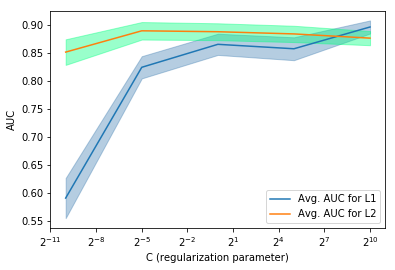

In [123]:
l1_mean = numpy.array([x.mean_validation_score for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l1'])
l2_mean = numpy.array([x.mean_validation_score for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l2'])
l1_std = numpy.array([x.cv_validation_scores.std() for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l1'])
l2_std = numpy.array([x.cv_validation_scores.std() for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l2'])
print ("L1 max auc =", l1_mean.max(), "with c = ", c[numpy.where(l1_mean==l1_mean.max())[0][0]], "2^", math.log(c[numpy.where(l1_mean==l1_mean.max())[0][0]], 2))
print ("L2 max auc =", l2_mean.max(), "with c = ", c[numpy.where(l2_mean==l2_mean.max())[0][0]], "2^", math.log(c[numpy.where(l2_mean==l2_mean.max())[0][0]], 2))
plot.fill_between(c, l1_mean - l1_std, l1_mean + l1_std, color = 'steelblue', alpha = .4)
plot.plot(c, l1_mean, label='Avg. AUC for L1')
plot.xscale('log', basex=2); plot.legend(loc=4);
plot.xlabel('C (regularization parameter)'); plot.ylabel('AUC'); 
plot.fill_between(c, l2_mean - l2_std, l2_mean + l2_std, color = 'springgreen', alpha = .4)
plot.plot(c, l2_mean, label='Avg. AUC for L2')
plot.xscale('log', basex=2); plot.legend(loc=4);
plot.xlabel('C (regularization parameter)'); plot.ylabel('AUC'); 

Интерпретируемость моделей в применении к анализу текстов

In [140]:
import numpy

print ('\n', 'TOP 10 pos')
for idx in numpy.argsort(model.coef_)[0][::-1][:10]: # последние 10 с максимальным коэфициентом
    print ('{}, importance = {:.5f}'.format(words[idx], model.coef_[0][idx]))
print ('\n', 'TOP 10 neg')
for idx in numpy.argsort(model.coef_)[0][:10]: # последние 10 с минимальным коэфициентом
    print ('{}, importance = {:.5f}'.format(words[idx], model.coef_[0][idx]))


 TOP 10 pos
excellent, importance = 0.42114
great, importance = 0.40280
fun, importance = 0.39653
seen, importance = 0.37160
son, importance = 0.36178
job, importance = 0.35877
perfectly, importance = 0.33071
yet, importance = 0.31313
makes, importance = 0.31165
head, importance = 0.31096

 TOP 10 neg
bad, importance = -0.74266
only, importance = -0.50009
worst, importance = -0.48020
unfortunately, importance = -0.48003
waste, importance = -0.41759
boring, importance = -0.40629
nothing, importance = -0.38563
plot, importance = -0.38007
script, importance = -0.36052
poor, importance = -0.35729


Удалим стоп-слова

In [114]:
count_vect_WOSW = CountVectorizer(stop_words='english')
matrix_count_WOSW = count_vect_WOSW.fit_transform(all_texts).toarray()

X_train_WOSW, X_test_WOSW, Y_train_WOSW, Y_test_WOSW = cross_valid(matrix_count_WOSW, target, test_size=0.3)

model_WOSW = LogisticRegression()
model = LogisticRegression()


model_WOSW.fit(X_train_WOSW, Y_train_WOSW)
model.fit(X_train, Y_train)
predict = model.predict_proba(X_test)
predict_WOSW = model_WOSW.predict_proba(X_test_WOSW)

In [115]:
matrix_count_WOSW.shape

(2000, 39354)

(Logistic Regression ( l2 ) AUC =  0.9213107098381069
(Logistic Regression ( l2 WOSW ) AUC =  0.9199986657178438


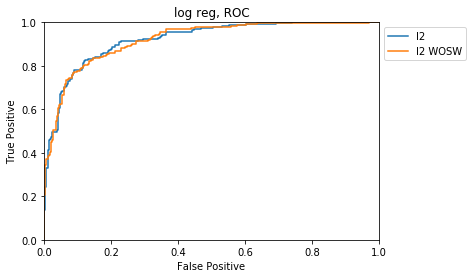

In [116]:
roc_curve('log reg, ROC', Y_test, predict, label='l2')
roc_curve('log reg, ROC', Y_test_WOSW, predict_WOSW, label='l2 WOSW')

In [57]:
sum(Y_test)

308

In [117]:
def logistic_reg(X_train, X_test, Y_train, **kwargs):
    model_logistic = LogisticRegression(**kwargs)
    model_logistic.fit(X_train, Y_train)
    predicted = model_logistic.predict_proba(X_test)
    return predicted, model_logistic

In [118]:
def get_auc(Y_test, predicted):
    fpr, tpr, _ = metrics.roc_curve(Y_test, predicted[:,1])
    return metrics.auc(fpr, tpr)

Можно варьировать max_features

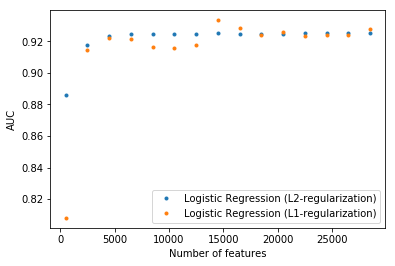

In [124]:
auc_map = {}
for i in range(500,30000,2000):
    count_vect_top_temp = CountVectorizer(max_features=i)
    matrix_counts_top_temp = count_vect_top_temp.fit_transform(all_texts).toarray()
    X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_top_temp, target)
    logreg_count_top_temp_predicted, _ = logistic_reg(X_train, X_test, Y_train, penalty='l1', C=1024)
    auc_map[i] = get_auc(Y_test, logreg_count_top_temp_predicted)
    
auc_map2 = {}
for i in range(500,30000,2000):
    count_vect_top_temp = CountVectorizer(max_features=i)
    matrix_counts_top_temp = count_vect_top_temp.fit_transform(all_texts).toarray()
    X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_top_temp, target)
    logreg_count_top_temp_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)
    auc_map2[i] = get_auc(Y_test, logreg_count_top_temp_predicted)
    
plot.plot(auc_map2.keys(), auc_map2.values(), '.', label='Logistic Regression (L2-regularization)')
plot.plot(auc_map.keys(), auc_map.values(), '.', label='Logistic Regression (L1-regularization)')
plot.xlabel('Number of features'); plot.ylabel('AUC'); 
plot.legend(loc=0);

Можно бинаризовать вектора, можно брать логарифмы частот вместо частот, можно TF-IDF. Сравним эти подходы.

In [127]:
matrix_counts = matrix_count
X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts, target)
logreg_counts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

def bin_f(x):
    return 1 if x > 0 else 0
n_vec_bin = numpy.vectorize(bin_f)
matrix_counts_bin = n_vec_bin(matrix_counts)
X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_bin, target)
binreg_bincounts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

import math

def log_f(x):
    return math.log(x+1)
n_vec_log = numpy.vectorize(log_f)
matrix_counts_log = n_vec_log(matrix_counts)
X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_log, target)
logreg_logcounts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

tfidf_vec = TfidfVectorizer()
matrix_tfidf = tfidf_vec.fit_transform(all_texts).toarray()
X_train, X_test, Y_train, Y_test = cross_valid(matrix_tfidf, target)
logreg_counts_l2_predicted_tfidf, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

(Logistic Regression ( freq ) AUC =  0.9249577477317202
(Logistic Regression ( binary ) AUC =  0.9524550791674079
(Logistic Regression ( logfreq ) AUC =  0.948719089130048
(Logistic Regression ( tf-idf ) AUC =  0.8618239637075253


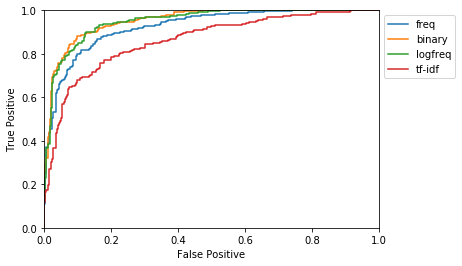

In [126]:
roc_curve('', Y_test, logreg_counts_l2_predicted, label='freq')
roc_curve('', Y_test, binreg_bincounts_l2_predicted, label='binary')
roc_curve('', Y_test, logreg_logcounts_l2_predicted, label='logfreq')
roc_curve('', Y_test, logreg_counts_l2_predicted_tfidf, label='tf-idf')

Не забываем про стемминг и морфоанализ

(Logistic Regression ( all ) AUC =  0.9249577477317202
(Logistic Regression ( w/o stop-words ) AUC =  0.9232231809286604
(Logistic Regression ( w/ stemming ) AUC =  0.9256026507738837
(Logistic Regression ( w/ stemming
w/o stop-words ) AUC =  0.9268035047144636


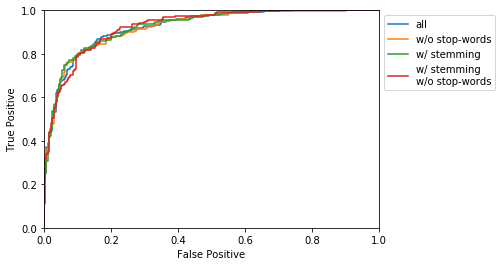

In [129]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems


count_vect_without_stopwords = CountVectorizer(stop_words='english')
matrix_counts_without_stopwords = count_vect_without_stopwords.fit_transform(all_texts).toarray()

count_vect_with_lemm = CountVectorizer(tokenizer=tokenize)
matrix_counts_with_lemm = count_vect_with_lemm.fit_transform(all_texts).toarray()

count_vect_with_lemm_without_stopwords = CountVectorizer(stop_words='english', tokenizer=tokenize)
matrix_counts_with_lemm_without_stopwords = count_vect_with_lemm_without_stopwords.fit_transform(all_texts).toarray()


X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts, target)
logreg_counts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_without_stopwords, target)
logreg_counts_l2_predicted_without_stopwords, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_with_lemm, target)
logreg_counts_l2_predicted_with_lemm, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_with_lemm_without_stopwords, target)
logreg_counts_l2_predicted_with_lemm_without_stopwords, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

roc_curve('',Y_test, logreg_counts_l2_predicted, label='all')
roc_curve('',Y_test, logreg_counts_l2_predicted_without_stopwords, label='w/o stop-words')
roc_curve('',Y_test, logreg_counts_l2_predicted_with_lemm, label='w/ stemming')
roc_curve('',Y_test, logreg_counts_l2_predicted_with_lemm_without_stopwords, label='w/ stemming\nw/o stop-words')